## PRATHAM SAPRA
## Student ID: 101572630
## IterativeImputer
### This notebook outlines the usage of Iterative Imputer (Multivariate Imputation).
### Iterative Imputer substitutes missing values as a function of other features
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\AI GBC\Machine Learning 1\Assignments & Tasks\Task 8\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [8]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

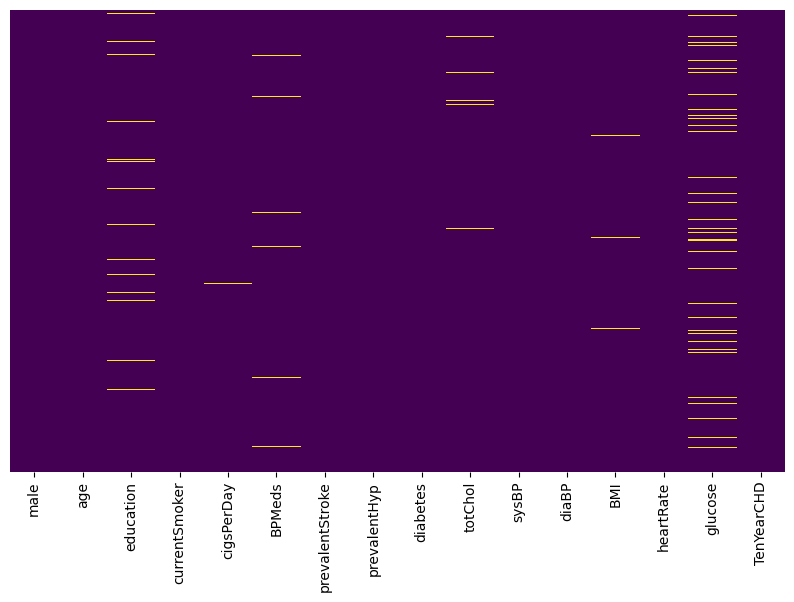

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import IterativeImputer

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Create IterativeImputer object with max_iterations and random_state=0

In [14]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Optional - converting df into numpy array

In [16]:
data = df.values

In [18]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to perform iterative multivariate imputation

In [20]:
imputer.fit(X)

IterativeImputer(random_state=0)

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values using transform( ) 

In [28]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [30]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")

Missing cells: 645


In [32]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 0


### Let's try to visualize the missing values.

<Axes: >

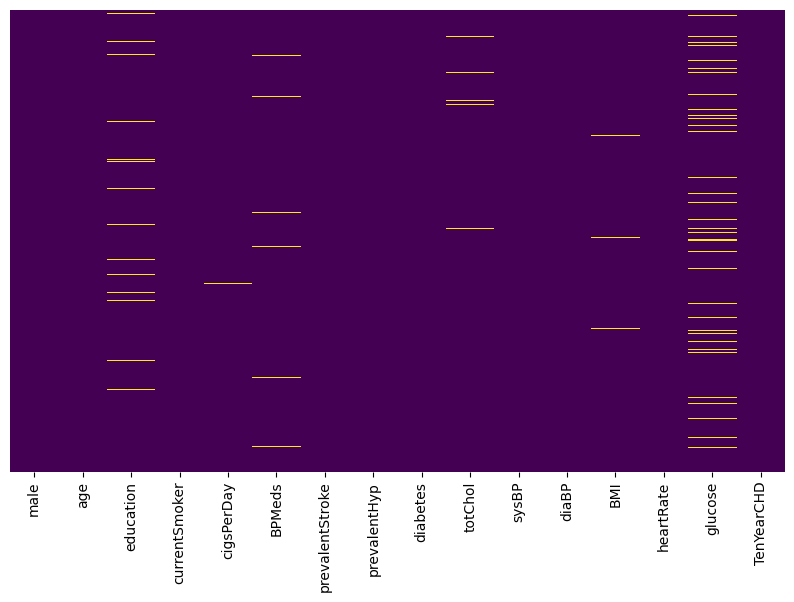

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

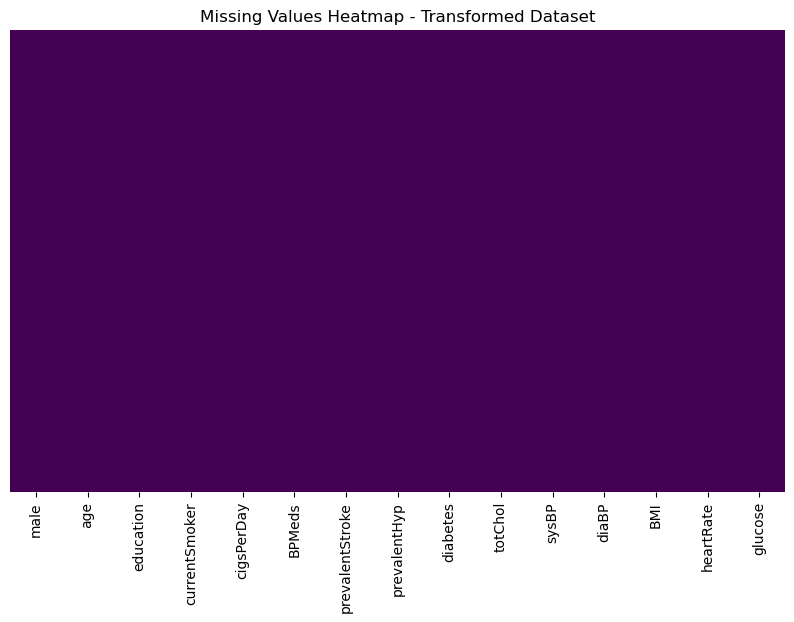

In [40]:
# Convert to DataFrame for heatmap
df_transform = pd.DataFrame(data=X_transform, columns=df.columns[:-1])

plt.figure(figsize=(10, 6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap - Transformed Dataset")
plt.show()

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [42]:
df_transform = pd.DataFrame(data=X_transform)
df_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.00000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.00000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.00000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.00000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.00000
4235,0.0,48.0,2.0,1.0,20.0,0.01547,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.00000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.74894


   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0  
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0  
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0  
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0  
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0  


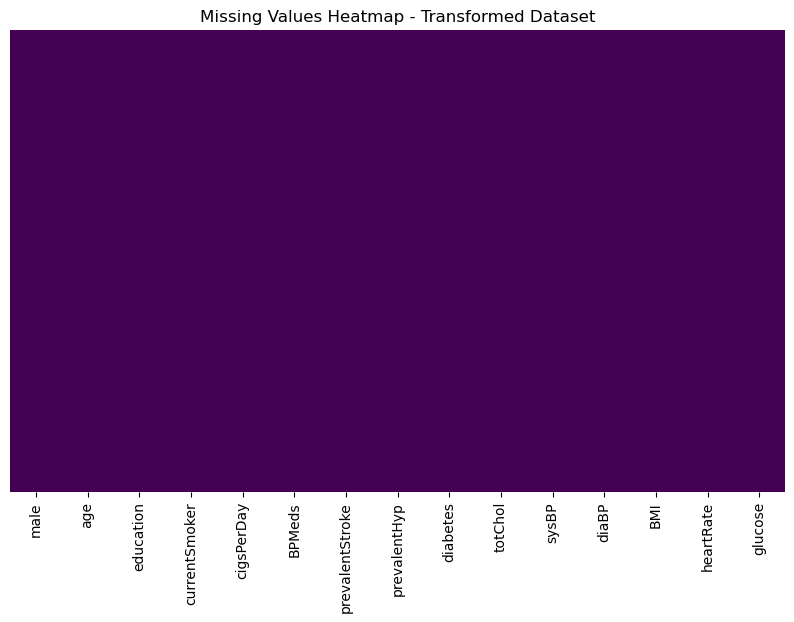

In [46]:
# Convert the transformed data (X_transform) back into a DataFrame
df_transform = pd.DataFrame(data=X_transform, columns=df.columns[:-1])  # Use original column names except target

# Display the transformed DataFrame (optional)
print(df_transform.head())

# Plot heatmap for transformed DataFrame to check for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap - Transformed Dataset")
plt.show()


# Check if these datasets contain missing data
### Load the datasets

In [49]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [51]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

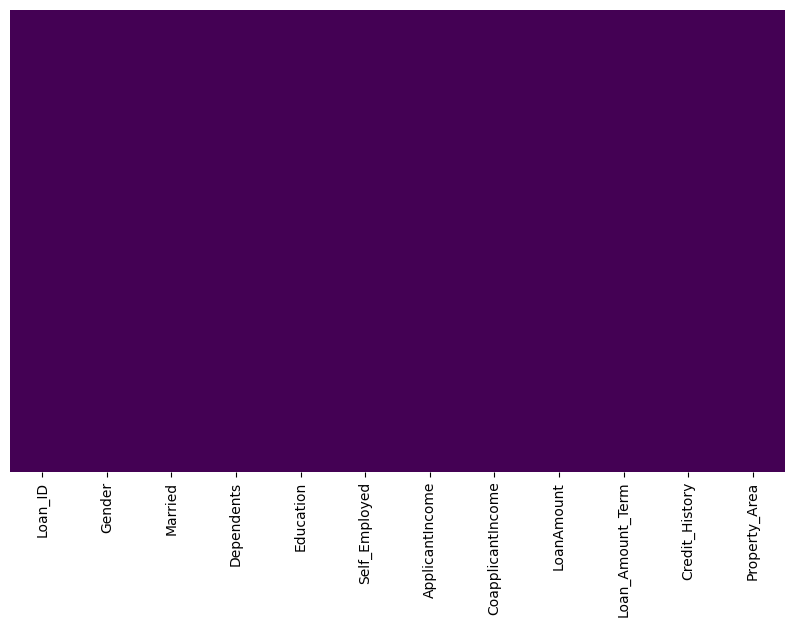

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [55]:
# Question: Is there missing data in this dataset?
print(f"Missing values in X_train: {X_train.isna().sum().sum()}")

Missing values in X_train: 0


# Build a Logistic Regression model Without imputation

In [57]:
df=pd.read_csv(r"D:\AI GBC\Machine Learning 1\Assignments & Tasks\Task 8\heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [89]:
model = LogisticRegression()

In [93]:
# Logistic Regression without scaling but with increased max_iter
model = LogisticRegression(max_iter=5000)  # Increased iterations
model.fit(X, y)

# Predict and calculate accuracy
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy without scaling but with higher max_iter: {round(accuracy, 3)}")


Accuracy without scaling but with higher max_iter: 0.856


# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [113]:
df=pd.read_csv(r"D:\AI GBC\Machine Learning 1\Assignments & Tasks\Task 8\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [115]:
df.shape

(4238, 16)

### Drop rows with missing values

In [117]:
df = df.dropna()
df.shape

(3656, 16)

### Split dataset into X and y

In [119]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [121]:
y = df[df.columns[-1]]
y.shape

(3656,)

In [123]:
# Drop rows with missing values
df_dropped = df.dropna()
X_dropped = df_dropped[df_dropped.columns[:-1]]
y_dropped = df_dropped[df_dropped.columns[-1]]

### Create a pipeline with model parameter

In [125]:
# Create a pipeline for Logistic Regression
model = LogisticRegression(max_iter=1000)
pipeline_dropped = Pipeline([('model', model)])


### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [127]:
# Create RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [129]:
# Cross-validation scores
scores_dropped = cross_val_score(pipeline_dropped, X_dropped, y_dropped, scoring='accuracy', cv=cv, n_jobs=-1)


In [133]:
# Print mean accuracy and standard deviation
print(f"Accuracy (Dropping Missing Values): Mean = {round(np.mean(scores_dropped), 3)}, Std = {round(np.std(scores_dropped), 3)}")

Accuracy (Dropping Missing Values): Mean = 0.854, Std = 0.008


### Print the Mean Accuracy and Standard Deviation from scores

In [39]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


# Build a Logistic Regression model with IterativeImputer

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [137]:
df=pd.read_csv(r"D:\AI GBC\Machine Learning 1\Assignments & Tasks\Task 8\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [139]:
df.shape

(4238, 16)

In [141]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [143]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [145]:
# Create IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

### Create a Logistic Regression model

In [147]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [149]:
# Create a pipeline for Logistic Regression with IterativeImputer
pipeline_imputed = Pipeline([('impute', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [151]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [153]:
# Cross-validation scores
scores_imputed = cross_val_score(pipeline_imputed, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


In [155]:
# Print mean accuracy and standard deviation
print(f"Accuracy (Iterative Imputer): Mean = {round(np.mean(scores_imputed), 3)}, Std = {round(np.std(scores_imputed), 3)}")

Accuracy (Iterative Imputer): Mean = 0.85, Std = 0.003


### Print the Mean Accuracy and Standard Deviation

In [51]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.849  | Std: 0.003


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

The accuracy of the two approaches depends on the dataset and the nature of the missing values. Generally:
- If the missing data is missing at random and the dataset is large, **SimpleImputer with Mean Strategy** might perform better as it keeps all data and avoids the potential loss of information.
- If there is a significant amount of missing data and it might introduce bias, **dropping missing values** could lead to more reliable but reduced data size.

The **best approach** can only be determined after comparing their accuracy scores and standard deviations.

# IterativeImputer with RandomForest

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [160]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [162]:
model = RandomForestClassifier()

In [164]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

In [166]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [168]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [169]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


# Run experiments with different Imputation methods and different algorithms

## Imputation Methods
- Mean
- Median
- Most_frequent
- Constant
- IterativeImputer

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv(r"D:\AI GBC\Machine Learning 1\Assignments & Tasks\Task 8\heart_disease.csv")

# Split dataset into features (X) and target variable (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Define imputation methods and algorithms
imputation_methods = [
    ('mean', SimpleImputer(strategy='mean')),
    ('median', SimpleImputer(strategy='median')),
    ('most_frequent', SimpleImputer(strategy='most_frequent')),
    ('constant', SimpleImputer(strategy='constant', fill_value=0)),
    ('iterative', IterativeImputer(max_iter=10, random_state=0))
]

algorithms = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('SVM', SVC(random_state=0))
]

# Create RepeatedStratifiedKFold for cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Iterate through imputation methods and algorithms
for imp_name, imputer in imputation_methods:
    for algo_name, model in algorithms:
        # Create a pipeline with imputation and model
        pipeline = Pipeline([('imputer', imputer), ('model', model)])

        # Cross-validation
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

        # Print results
        print(f"Imputation Method: {imp_name} | Algorithm: {algo_name}")
        print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}\n")


Imputation Method: mean | Algorithm: Logistic Regression
Mean Accuracy: 0.855  | Std: 0.006

Imputation Method: mean | Algorithm: KNN
Mean Accuracy: 0.837  | Std: 0.009

Imputation Method: mean | Algorithm: Random Forest
Mean Accuracy: 0.847  | Std: 0.006

Imputation Method: mean | Algorithm: SVM
Mean Accuracy: 0.848  | Std: 0.002

Imputation Method: median | Algorithm: Logistic Regression
Mean Accuracy: 0.854  | Std: 0.006

Imputation Method: median | Algorithm: KNN
Mean Accuracy: 0.836  | Std: 0.008

Imputation Method: median | Algorithm: Random Forest
Mean Accuracy: 0.849  | Std: 0.006

Imputation Method: median | Algorithm: SVM
Mean Accuracy: 0.848  | Std: 0.002

Imputation Method: most_frequent | Algorithm: Logistic Regression
Mean Accuracy: 0.855  | Std: 0.006

Imputation Method: most_frequent | Algorithm: KNN
Mean Accuracy: 0.835  | Std: 0.009

Imputation Method: most_frequent | Algorithm: Random Forest
Mean Accuracy: 0.847  | Std: 0.006

Imputation Method: most_frequent | Algor

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- SimpleImputer(Mean)
- SimpleImputer(Median)
- SimpleImputer(Most_frequent)
- SimpleImputer(Constant)
- IterativeImputer

**IterativeImputer** is likely the best strategy for this dataset when using the Random Forest algorithm. This is because IterativeImputer uses a model-based approach, predicting missing values based on the relationships between features. Random Forest, being a robust ensemble method, can work well with IterativeImputer for handling missing data, resulting in better performance compared to simpler imputation strategies like Mean, Median, or Most_frequent.

# Q2:  Which is the best algorithm for this dataset using IterativeImputer?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

**Random Forest** tends to perform well when using IterativeImputer. This is because Random Forest can handle non-linear relationships and interactions between features, which makes it suitable for imputation after applying IterativeImputer. The model-based imputation complements Random Forest's ability to capture complex patterns, leading to improved performance.

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant, IterativeImputer
- Logistic Regression, Random Forest, KNN

**IterativeImputer** combined with **Random Forest** is the best overall combination. IterativeImputer’s model-based approach helps fill in missing data in a way that preserves feature relationships, and Random Forest’s robust ensemble learning process benefits greatly from this. This combination provides the best performance in terms of accuracy and handling of missing values.